In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

# Personal Finance Planner

## Collecting crypto data using request library

In [5]:
# current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetching current BTC price
btc=requests.get(btc_url)
btc_price=btc.content
data1=json.loads(btc_price)
print(json.dumps(data1, indent=4))
bitcoinprice=data1['data']['1']['quotes']['USD']['price']
bitcoinprice

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19522312,
            "total_supply": 19522312,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 33710.0,
                    "volume_24h": 33925558079,
                    "market_cap": 657867273653,
                    "percentage_change_1h": 2.51225801761639,
                    "percentage_change_24h": 11.7985151230619,
                    "percentage_change_7d": 19.0812513478972,
                    "percent_change_1h": 2.51225801761639,
                    "percent_change_24h": 11.7985151230619,
                    "percent_change_7d": 19.0812513478972
                }
            },
            "last_updated": 1698109799
        }
    },
    "metadata": {
        "timestamp": 1698109799,
        "num_cryptocur

33710.0

In [8]:
# Fetching Ethereum Price
eth_price=requests.get(eth_url).content
data2=json.loads(eth_price)
print(json.dumps(data2, indent=4))
ethereumprice=data2['data']['1027']['quotes']['USD']['price']
ethereumprice

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120267760,
            "total_supply": 120267760,
            "max_supply": 120267760,
            "quotes": {
                "USD": {
                    "price": 1785.49,
                    "volume_24h": 24261059738,
                    "market_cap": 214673060228,
                    "percentage_change_1h": 1.58998190145977,
                    "percentage_change_24h": 6.55373540129105,
                    "percentage_change_7d": 11.9684295490566,
                    "percent_change_1h": 1.58998190145977,
                    "percent_change_24h": 6.55373540129105,
                    "percent_change_7d": 11.9684295490566
                }
            },
            "last_updated": 1698109793
        }
    },
    "metadata": {
        "timestamp": 1698109793,
        "nu

1785.49

###  Current value of my Crypto assets

In [9]:
my_btc_value=my_btc*bitcoinprice
my_eth_value=my_eth*ethereumprice
my_crypto_value=my_btc_value+my_eth_value
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of my cryptoassets is ${my_crypto_value:0.2f}")

The current value of your 1.2 BTC is $40452.00
The current value of your 5.3 ETH is $9463.10
The current value of my cryptoassets is $49915.10


## Collecting Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Setting Alpaca API key and secret
alpaca_api_key = os.getenv("PubAlpaca_key")
alpaca_secret_key = os.getenv("SecretAlpaca_key")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-20", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df
df_ticker
SPY= df_ticker[df_ticker['symbol']=='SPY'].drop('symbol',axis=1)

AGG=df_ticker[df_ticker['symbol']=='AGG'].drop('symbol',axis=1)
#Concatenate the ticker DataFrames
df_ticker1 = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])
df_ticker1


SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-10-20 04:00:00+00:00  421.19  426.54  421.08      733333  425.98   

                                                   AGG                   \
                              volume        vwap close    high      low   
timestamp                                                                 
2023-10-20 04:00:00+00:00  123919876  423.466599  92.0  92.135  91.9006   

                                                                  
                          trade_count   open   volume       vwap  
timestamp                                                         
2023-10-20 04:00:00+00:00       25643  91.94  6630026  92.007834

In [13]:
# current prices data frame
df_currentprices=pd.DataFrame()
df_currentprices['SPY']=df_ticker1['SPY']['close']
df_currentprices['AGG']=df_ticker1['AGG']['close']
# Drop the time component of the date
df_currentprices.index = df_currentprices.index.date
df_currentprices


,SPY,AGG
2023-10-20,421.19,92.0


In [14]:
#finding the current prices
spy_currentprice=df_currentprices.iloc[0][0]
agg_currentprice=df_currentprices.iloc[0][1]


In [15]:
#finding my current value in stocks
my_spy_value=my_spy *spy_currentprice
my_agg_value=my_agg *agg_currentprice
my_inv_value=my_spy_value+my_agg_value

print(f"The current value of your {my_spy} SPY is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG is ${my_agg_value:0.2f}")
print(f"The current value of my investment assets  is ${my_inv_value:0.2f}")

The current value of your 50 SPY is $21059.50
The current value of your 200 AGG is $18400.00
The current value of my investment assets  is $39459.50


## Savings Health Analysis

In [16]:
# Creating a data frame containing my crpto assets value and stock assets value
Idx=['Crypto', 'Shares']
Amount=[my_crypto_value,my_inv_value]
df_savings=pd.DataFrame(index= Idx)
df_savings['AMOUNT']=Amount
df_savings

,AMOUNT
Crypto,49915.097
Shares,39459.500


In [17]:
total_savings=df_savings.iloc[0][0]+df_savings.iloc[1][0]
monthly_income=12000
Emergency_fund=monthly_income*3
if total_savings>Emergency_fund:
    print("Congratulations!You have enough money")
elif total_savings==Emergency_fund:
    print("Congratulations!You have reached your financial goal")  
elif total_savings<Emergency_fund:
    print(f"You are ${Emergency_fund-total_savings}away from your financial goal")

Congratulations!You have enough money


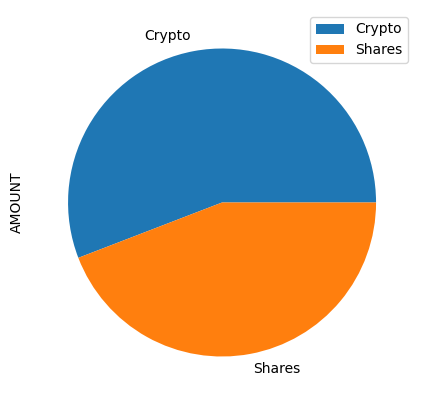

In [18]:
plot = df_savings.plot(kind='pie', subplots=True, figsize=(5,5))

## Retirement Planning

### Montecarlo Simulation

In [19]:
# importing Historical data for "SPY" and "AGG" from Alpacas
tickers = ["AGG", "SPY"]
timeframe= "1Day"
start_date=pd.start_date = pd.Timestamp('2018-10-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-20', tz='America/New_York').isoformat()
# Getting 5 year's worth of historical price data.
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-16 04:00:00+00:00,436.04,437.14,433.570,540501,433.82,75433196,435.644964,SPY
2023-10-17 04:00:00+00:00,436.02,438.14,432.450,579314,432.81,75324710,435.388283,SPY
2023-10-18 04:00:00+00:00,430.21,435.18,429.090,691077,434.19,93559799,432.132728,SPY
2023-10-19 04:00:00+00:00,426.43,432.82,425.725,880806,430.95,121322959,428.955351,SPY
2023-10-20 04:00:00+00:00,421.19,426.54,421.080,733333,425.98,123919876,423.466599,SPY


In [20]:
#Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.head()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-10-22 04:00:00+00:00  275.03  277.36  274.41      449535  277.00   
2018-10-23 04:00:00+00:00  273.52  274.87  268.61      837023  270.95   
2018-10-24 04:00:00+00:00  265.21  273.76  264.70      938613  273.33   
2018-10-25 04:00:00+00:00  270.01  271.81  266.23      733954  267.38   
2018-10-26 04:00:00+00:00  265.22  271.00  262.29     1111846  265.92   

                                                     AGG                   \
                              volume        vwap   close    high      low   
timestamp                                                                   
2018-10-22 04:00:00+00:00   83420677  275.565255  104.35  104.52  104.340   
2018-10-23 04:00:00+00:00  148031789  271.959702  104.48  104.74  104.475   
2018-10-24 04:00:00+00:00  180061325  269.071189  104.75  104.81  104.670   
2018-10-25 04:00:00+00:00  140353452  269.146254  104.66  104.77  104.610   
2018-10-26 04:00:00+00:00  203923040  265.531968  104.90  105.05  104.870   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2018-10-22 04:00:00+00:00       11391  104.47   2948119  104.408492  
2018-10-23 04:00:00+00:00       14144  104.67   3695313  104.605860  
2018-10-24 04:00:00+00:00       17520  104.69   4849462  104.742653  
2018-10-25 04:00:00+00:00       15828  104.71  12638378  104.664656  
2018-10-26 04:00:00+00:00       15037  104.88   7199420  104.931247

In [22]:
# Configuring Montecarlo simulation for 30 yeras
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
#Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-10-22 04:00:00+00:00  275.03  277.36  274.41      449535  277.00   
2018-10-23 04:00:00+00:00  273.52  274.87  268.61      837023  270.95   
2018-10-24 04:00:00+00:00  265.21  273.76  264.70      938613  273.33   
2018-10-25 04:00:00+00:00  270.01  271.81  266.23      733954  267.38   
2018-10-26 04:00:00+00:00  265.22  271.00  262.29     1111846  265.92   

                                                                  AGG          \
                              volume        vwap daily_return   close    high   
timestamp                                                                       
2018-10-22 04:00:00+00:00   83420677  275.565255          NaN  104.35  104.52   
2018-10-23 04:00:00+00:00  148031789  271.959702    -0.005490  104.48  104.74   
2018-10-24 04:00:00+00:00  180061325  269.071189    -0.030382  104.75  104.81   
2018-10-25 04:00:00+00:00  140353452  269.146254     0.018099  104.66  104.77   
2018-10-26 04:00:00+00:00  203923040  265.531968    -0.017740  104.90  105.05   

                                                                              \
                               low trade_count    open    volume        vwap   
timestamp                                                                      
2018-10-22 04:00:00+00:00  104.340       11391  104.47   2948119  104.408492   
2018-10-23 04:00:00+00:00  104.475       14144  104.67   3695313  104.605860   
2018-10-24 04:00:00+00:00  104.670       17520  104.69   4849462  104.742653   
2018-10-25 04:00:00+00:00  104.610       15828  104.71  12638378  104.664656   
2018-10-26 04:00:00+00:00  104.870       15037  104.88   7199420  104.931247   

                                        
                          daily_return  
timestamp                               
2018-10-22 04:00:00+00:00          NaN  
2018-10-23 04:00:00+00:00     0.001246  
2018-10-24 04:00:00+00:00     0.002584  
2018-10-25 04:00:00+00:00    -0.000859  
2018-10-26 04:00:00+00:00     0.002293

In [24]:
#Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulated_df= pd.DataFrame(MC_thirtyyear.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 110.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 120.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 130.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 140.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 150.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 160.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 170.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 180.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 190.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 200.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 210.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 220.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 230.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 240.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 250.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 260.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 270.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 280.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 290.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 300.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 310.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 320.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 330.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 340.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 350.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 360.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 370.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 380.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 390.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 400.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 410.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 420.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 430.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 440.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 450.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 460.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 470.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 480.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

Running Monte Carlo simulation number 490.


C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\aniru\OneDrive\Desktop\API--Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

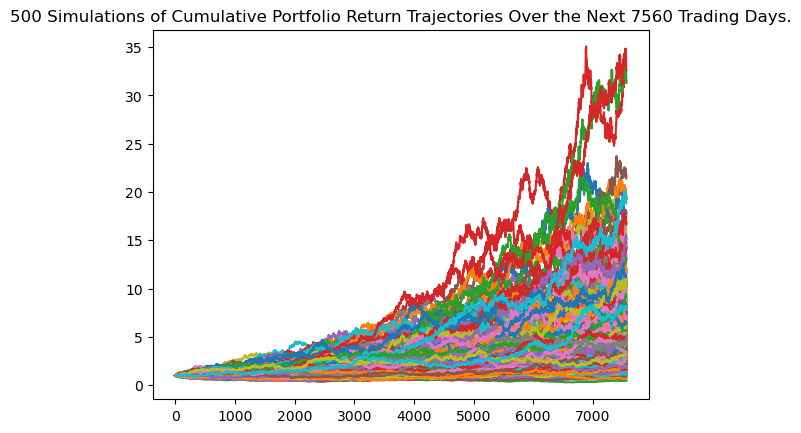

In [25]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

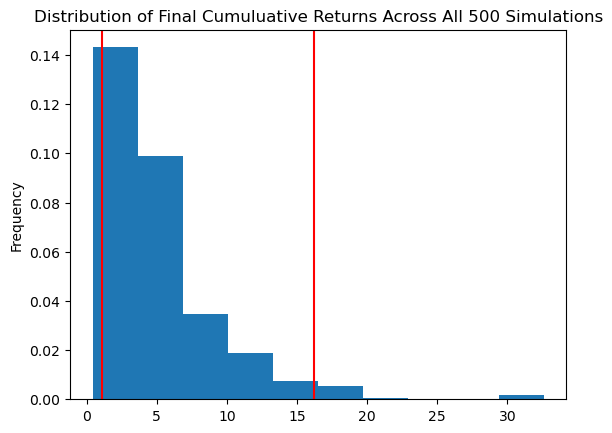

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = simulated_df.iloc[-1].describe()

# Print summary statistics
print(tbl)

count    500.000000
mean       5.166857
std        4.161222
min        0.442771
25%        2.483979
50%        3.932463
75%        6.504083
max       32.586272
Name: 7560, dtype: float64


##  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [30]:
# Set initial investment
initial_investment = 20000
ci_lower = tbl.quantile(0.05)*initial_investment
ci_upper = tbl.quantile(0.95)*initial_investment



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23143.876778821807 and $6728103.900572153


## Calculating the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [31]:
# Setting initial investment
initial_investment = 20000 * 1.5

ci_lower = tbl.quantile(0.05)*initial_investment
ci_upper = tbl.quantile(0.95)*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $34715.81516823271 and $10092155.850858228
